# 美国研究生录取预测 #

本项目通过对美国本科学生申请美国研究生院的录取几率的预测，来初步了解机器学习的相关知识，应用逻辑回归模型进行简单的机器学习建模。<br>
使用的数据集是从 https://tianchi.aliyun.com/dataset/dataDetail?dataId=1901 上获取，数据集本身相对完整，不需要再进行数据采集。<br>
数据集的主要信息如下：

| 特征    | 含义    |
|----------|-----------|
|GRE Score   |GRE考试分数  |
|TOEFL Score  |TOEFL考试分数|
|University Rating|大学相对排名 |
|SOP   |申请文书(Statement of Purpose)评分 |
|LOR   |推荐信(Letter of Recommendation)评分 |
|CGPA   |核心课程GPA (Core GPA)  |
|Research  |是否有实验室研究经历  |
|Admit / Chance of Admit |该学生录取该院校的几率|

In [1]:
# -*- coding:utf-8 -*-

# 导入需要使用的库包并进行相关设定
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})

In [2]:
# 导入数据集
df = pd.read_csv('Admission_Predict.csv')
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


## 1、数据集探索

In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
# 'LOR '和'Chance of Admit '列名中含有空格，修改列名，去掉空格
df.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'}, inplace=True)
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [5]:
def change_to_categorical(x):
    if x<=0.64:
      return 'low'
    elif x>=0.83:
      return 'high'
    else:
      return 'normal'
df['Admit'] = df['Chance of Admit'].apply(change_to_categorical)
df = df.drop(['Chance of Admit'], axis=1)

In [6]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,high
1,2,324,107,4,4.0,4.5,8.87,1,normal
2,3,316,104,3,3.0,3.5,8.00,1,normal
3,4,322,110,3,3.5,2.5,8.67,1,normal
4,5,314,103,2,2.0,3.0,8.21,0,normal
5,6,330,115,5,4.5,3.0,9.34,1,high
6,7,321,109,3,3.0,4.0,8.20,1,normal
7,8,308,101,2,3.0,4.0,7.90,0,normal
8,9,302,102,1,2.0,1.5,8.00,0,low
9,10,323,108,3,3.5,3.0,8.60,0,low


为便于对学生录取几率的预测，对预测结果划分为高中低三类：<br>
High: 录取几率大于等于0.83<br>
Normal: 录取几率在0.64到0.83之间<br>
Low：录取几率小于等于0.64<br>

In [7]:
# 查看数据集行列数
df.shape

(400, 9)

In [8]:
# 检查数据是否有空缺值
df.isnull().sum()
# 可以看出这个数据集没有空缺值

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admit                0
dtype: int64

In [9]:
# 检查每个特征的数据类型  
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Admit                 object
dtype: object

In [10]:
# 看看所有特征的信息统计
df.describe(include = 'all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,NaN
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,NaN
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,NaN
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,NaN
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,NaN
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,NaN


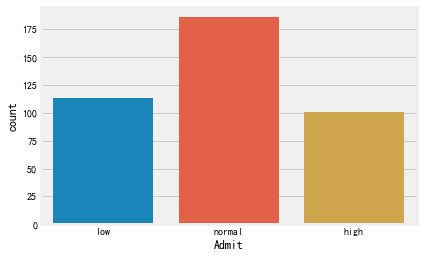

In [11]:
# 查看数据集的结果是否平衡
sns.countplot(x = 'Admit', order = ['low', 'normal', 'high'],data = df)
# 可以看出这个数据集分布比较均衡，近似正态分布

In [12]:
# 查看GRE Score, TOEFL Score的unique元素
print('GRE Score :', sorted(list(df['GRE Score'].unique())))
print('TOEFL Score :', sorted(list(df['TOEFL Score'].unique())))

GRE Score : [290, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340]
TOEFL Score : [92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]


In [13]:
# 查看University Rating的unique元素
print('University Rating :', df['University Rating'].unique())

University Rating : [4 3 2 5 1]


In [14]:
# 查看SOP和LOR的unique元素
print('SOP :', df['SOP'].unique())
print('LOR :', df['LOR'].unique())

SOP : [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5]
LOR : [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ]


In [15]:
# 查看CGPA的unique元素
print('CGPA :', df['CGPA'].unique())

CGPA : [9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.26 9.43
 9.06 8.75 8.89 8.69 7.86 9.01 8.97 8.33 8.27 7.98 8.04 9.07 9.13 9.23
 8.32 8.98 8.94 9.53 8.52 8.43 8.54 9.91 9.87 7.65 7.89 9.14 9.66 9.78
 9.42 9.26 8.79 8.23 8.53 8.07 9.31 9.17 9.19 8.37 7.68 8.15 8.73 8.83
 8.57 9.68 8.09 8.17 7.64 8.01 7.95 8.49 7.87 7.97 8.18 8.55 8.74 8.13
 8.44 9.47 8.24 7.34 7.43 7.25 8.06 7.67 9.54 9.62 7.56 9.74 9.82 7.96]


In [16]:
# 查看Research的unique元素
print('Research :', df['Research'].unique())

Research : [1 0]


In [17]:
# 查看Admit的unique元素
print('Admit :', df['Admit'].unique())

Admit : ['high' 'normal' 'low']


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Admit                400 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 28.2+ KB


## 2、数据集可视化 ##

| 特征类别    | 特征名称    |
|--------------|--------------|
|数字型特征   |GRE Score, TOEFL Score, CGPA        |
|分类型特征   |University Rating, SOP, LOR, Research  |

### 2.1、数字型特征可视化 ###

(290, 340)

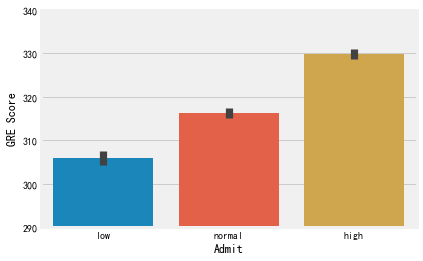

In [19]:
# 查看GRE Score和Admit的相关性
sns.barplot(x='Admit', y='GRE Score', order=['low', 'normal', 'high'], data=df)
plt.ylim((290, 340))

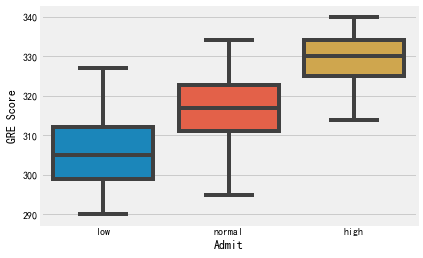

In [20]:
sns.boxplot(x = 'Admit',y = 'GRE Score', data = df, order = ['low', 'normal', 'high'])

(80, 120)

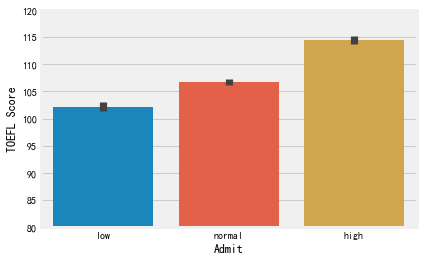

In [21]:
# 查看TOEFL Score和Admit的相关性
sns.barplot(x='Admit', y='TOEFL Score', order=['low', 'normal', 'high'], data=df)
plt.ylim((80, 120))

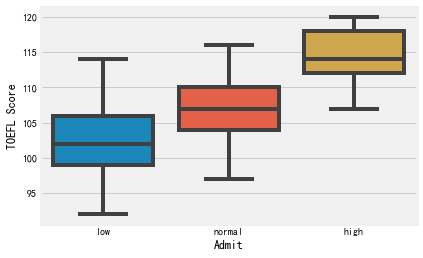

In [22]:
sns.boxplot(x = 'Admit',y = 'TOEFL Score', data = df, order = ['low', 'normal', 'high'])

(6, 10)

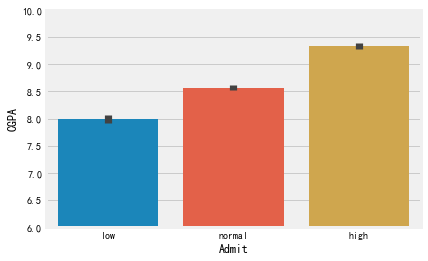

In [23]:
# 查看CGPA和Admit的相关性
sns.barplot(x='Admit', y='CGPA', order=['low', 'normal', 'high'], data=df)
plt.ylim((6, 10))

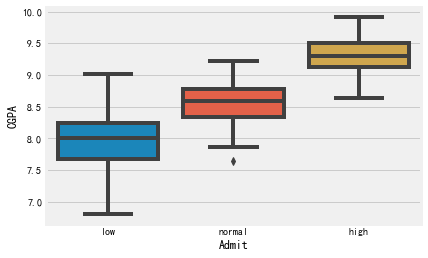

In [24]:
sns.boxplot(x = 'Admit',y = 'CGPA', data = df, order = ['low', 'normal', 'high'])

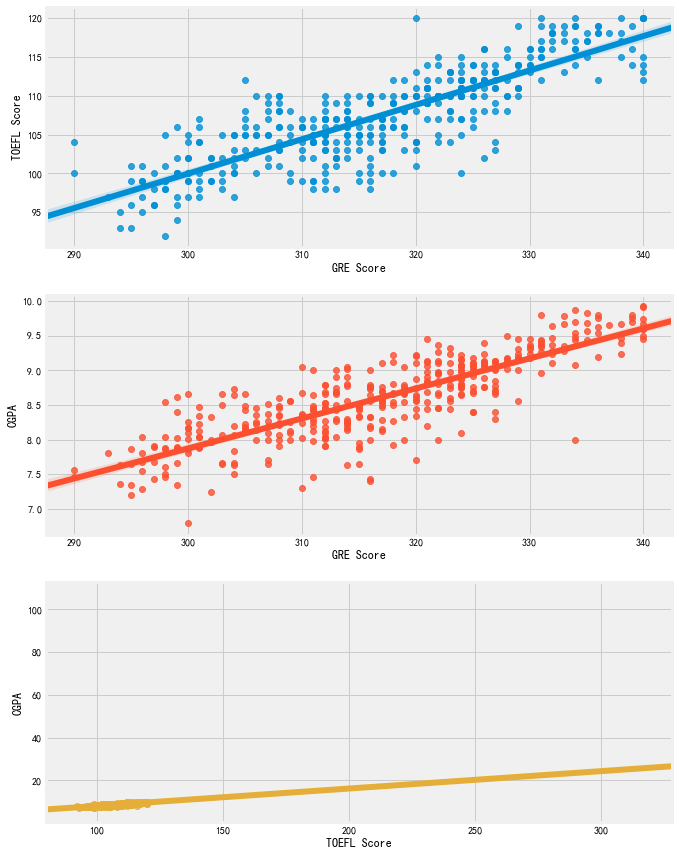

In [25]:
# 查看GRE Score, TOEFL Score, CGPA两两之间的相关性
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.regplot(x='GRE Score', y='TOEFL Score', data=df, ax=axes[0])
sns.regplot(x='GRE Score', y='CGPA', data=df, ax=axes[1])
sns.regplot(x='TOEFL Score', y='CGPA', data=df, ax=axes[2])

In [26]:
# 皮尔森相关性矩阵
corr = df[['GRE Score', 'TOEFL Score', 'CGPA']].corr()
corr

,GRE Score,TOEFL Score,CGPA
GRE Score,1.000000,0.835977,0.833060
TOEFL Score,0.835977,1.000000,0.828417
CGPA,0.833060,0.828417,1.000000


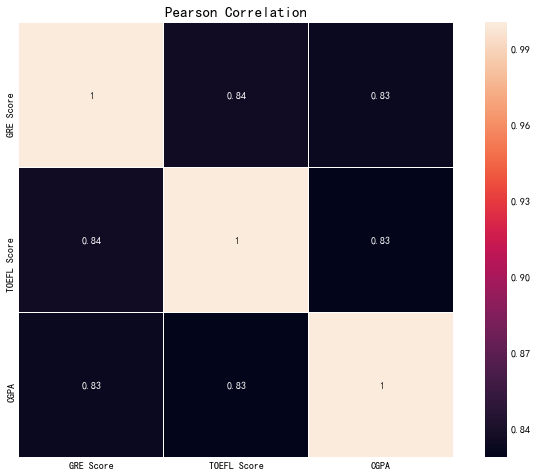

In [27]:
# 相关性矩阵可视化
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.title('Pearson Correlation', y=1.00, size=15)
sns.heatmap(corr, linewidth=0.1, vmax=1.0, square=True, linecolor='white', annot=True, ax = ax1,
        xticklabels=corr.columns, yticklabels=corr.columns)

从上面的相关矩阵以和热力图可以看出，GRE Score，TOEFL Score和CGPA这三个数字型特征，它们相互之间具有比较高的相关性，这一点也可以从上面的可视化结果中体现出来。

### 2.2、分类型特征可视化 ###

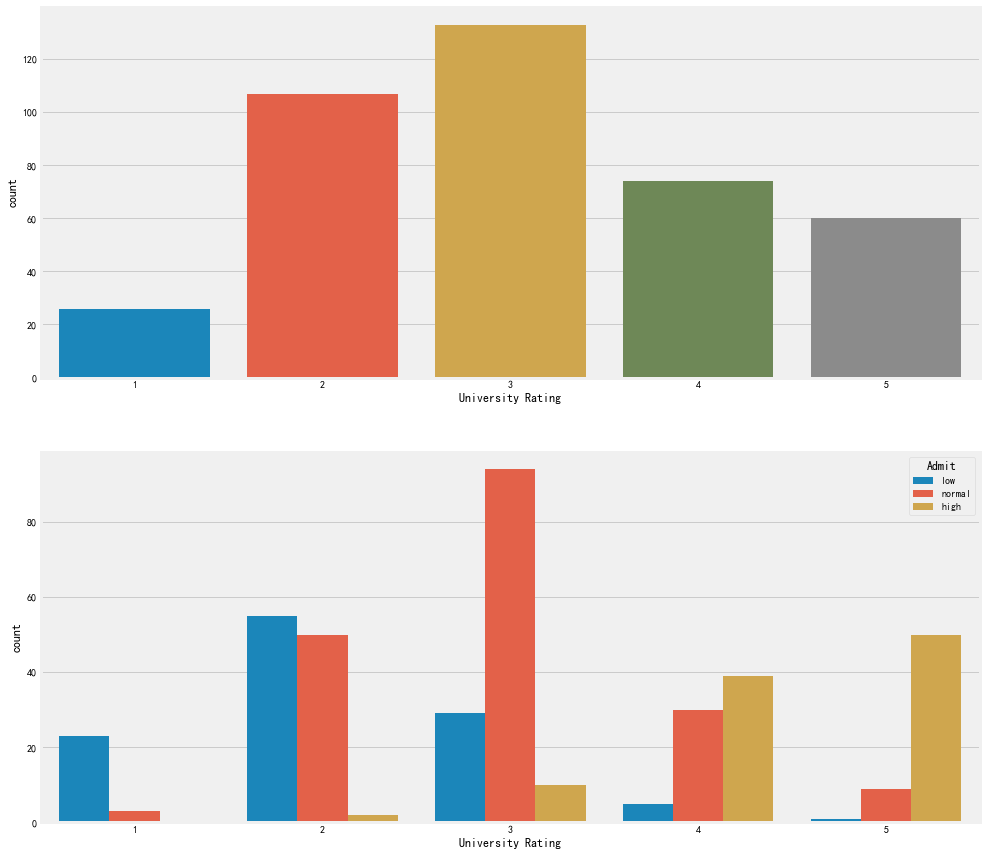

In [28]:
# University Rating 分布情况
f, [ax1, ax2] = plt.subplots(2, 1, figsize=(15, 15))
sns.countplot(x = 'University Rating', data = df, ax = ax1)
sns.countplot(x = 'University Rating', hue = 'Admit', hue_order = ['low', 'normal', 'high'], data = df, ax = ax2)

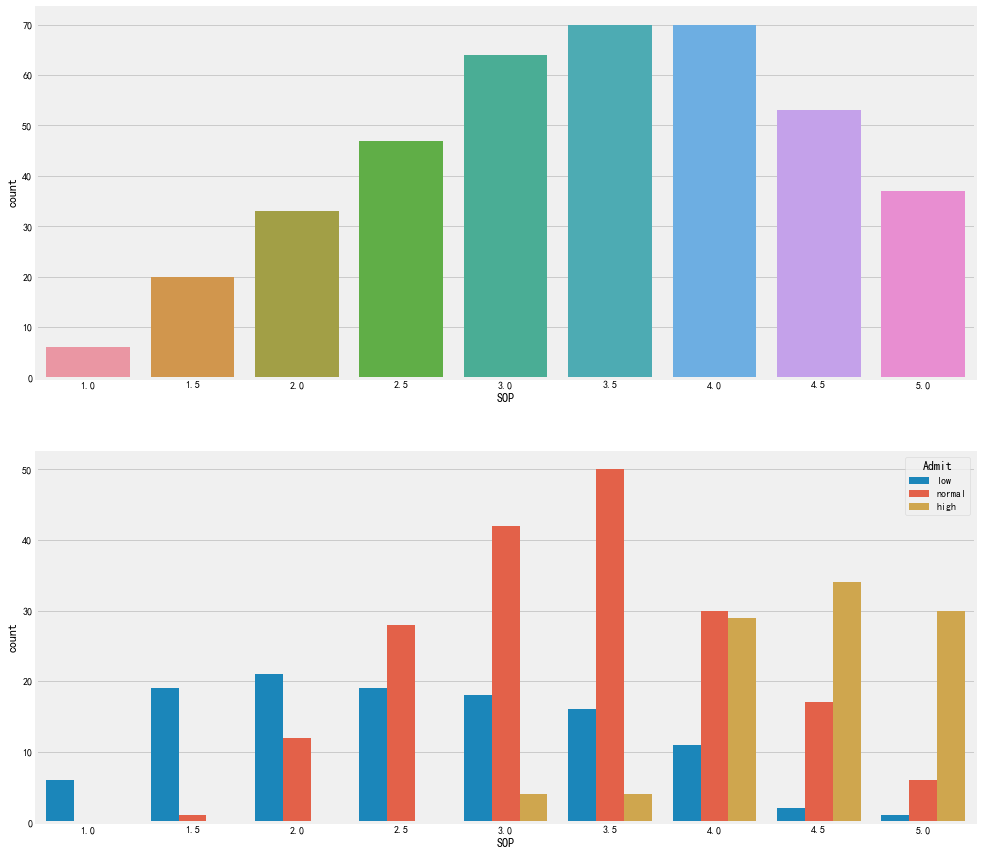

In [29]:
# SOP 分布情况
f, [ax1,ax2] = plt.subplots(2, 1, figsize=(15, 15))
sns.countplot(x = 'SOP' ,data = df,ax = ax1)
sns.countplot(x = 'SOP', hue = 'Admit',hue_order = ['low', 'normal', 'high'],data = df , ax = ax2)

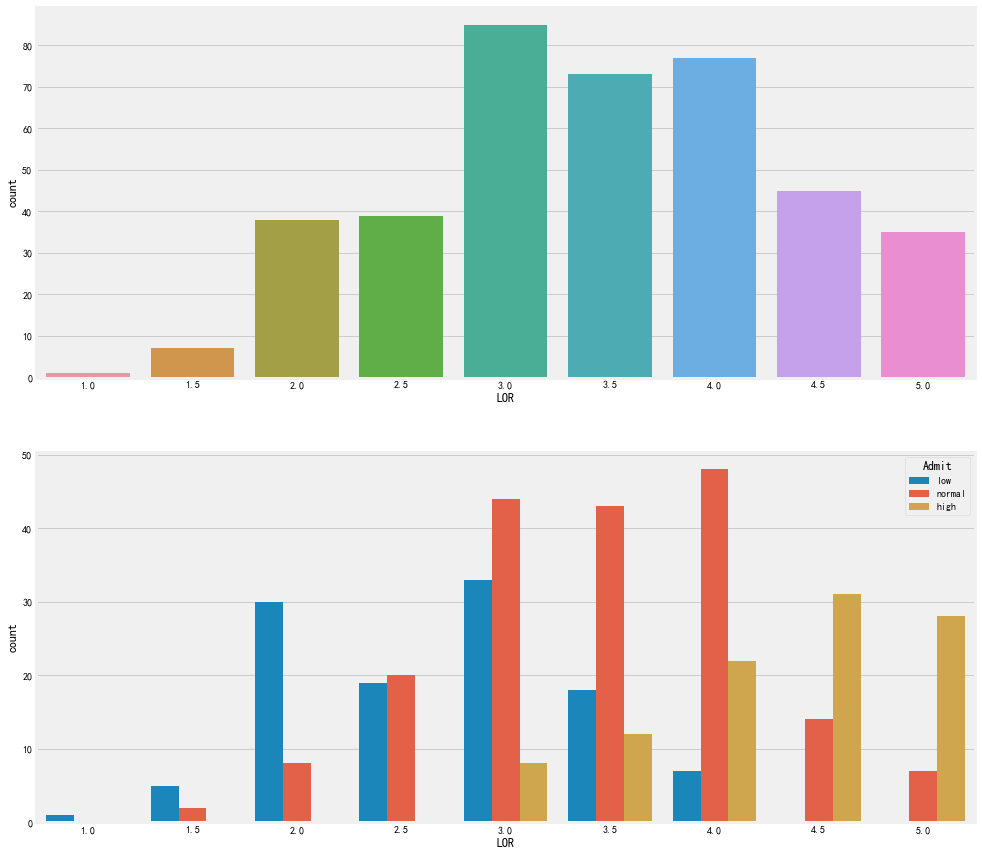

In [30]:
# LOR 分布情况
f, [ax1,ax2] = plt.subplots(2, 1, figsize=(15, 15))
sns.countplot(x = 'LOR' ,data = df,ax = ax1)
sns.countplot(x = 'LOR', hue = 'Admit',hue_order = ['low', 'normal', 'high'],data = df , ax = ax2)

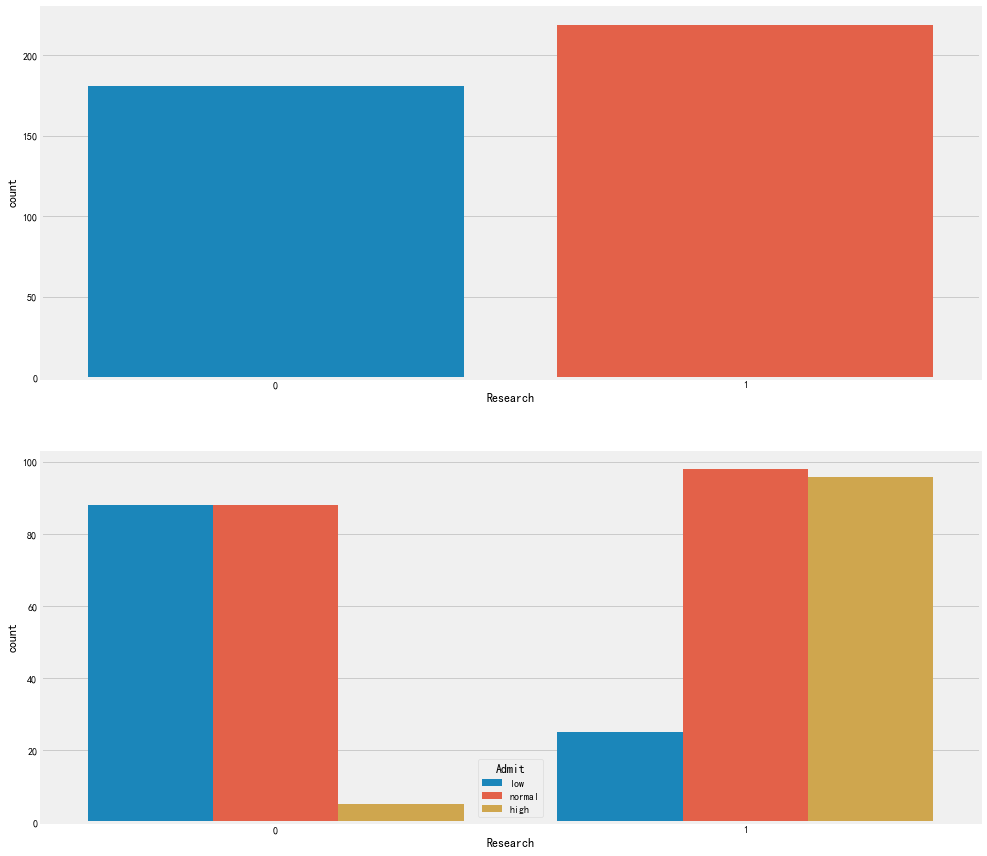

In [31]:
# Research 分布情况
f, [ax1,ax2] = plt.subplots(2, 1, figsize=(15, 15))
sns.countplot(x = 'Research' ,data = df,ax = ax1)
sns.countplot(x = 'Research', hue = 'Admit',hue_order = ['low', 'normal', 'high'],data = df , ax = ax2)

In [32]:
# 查看University Rating, SOP, LOR， Research两两之间的相关性
# 皮尔森相关性矩阵
corr0 = df[['University Rating','SOP','LOR','Research']].corr()
corr0

,University Rating,SOP,LOR,Research
University Rating,1.000000,0.734523,0.660123,0.447783
SOP,0.734523,1.000000,0.729593,0.444029
LOR,0.660123,0.729593,1.000000,0.396859
Research,0.447783,0.444029,0.396859,1.000000


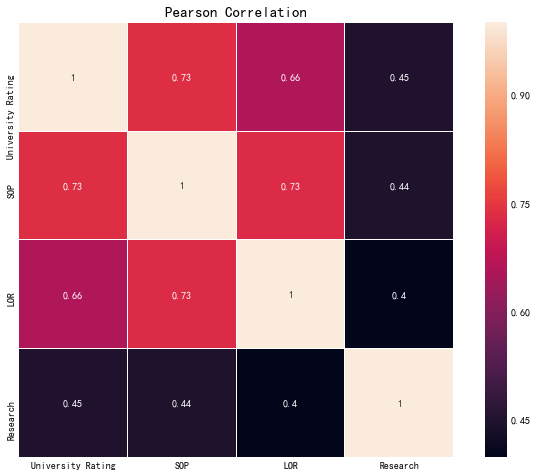

In [33]:
# 相关性矩阵可视化
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.title('Pearson Correlation', y=1.00, size=15)
sns.heatmap(corr0, linewidth=0.1, vmax=1.0, square=True, linecolor='white', annot=True, ax = ax1,
        xticklabels=corr0.columns, yticklabels=corr0.columns)

从上面的相关矩阵以和热力图可以看出，LOR和SOP，SOP和University Rating，具有比较高的相关性。

## 3、特征工程 ##

In [34]:
# 分析当Admit = low时，Research = 0 的概率
all_low = df.loc[(df['Admit'] == 'low'),'Research'] 
o_low =  df.loc[(df['Admit'] == 'low') & (df['Research'] == 0),'Research'] 

lo_score = o_low.count() / all_low.count()
print(lo_score)

0.7787610619469026


In [35]:
# 分析当Admit = high时，Research = 1 的概率
all_high = df.loc[(df['Admit'] == 'high'),'Research']
l_high =  df.loc[(df['Admit'] == 'high') & (df['Research'] == 1),'Research'] 

hl_score = l_high.count() / all_high.count()
print(hl_score)

0.9504950495049505


In [36]:
# 分析Research = 1的概率
a = df.loc[(df['Admit'] == 'high'), 'Admit'].count() / df['Admit'].count()
# 分析Admit = high的概率
b = df.loc[(df['Research'] == 1), 'Research'].count() / df['Research'].count()
print(a*b)

0.13824375


通过上面的分析，可以得出 Admit 和 Research，具有较高相关性。

In [37]:
# 观察特征之间的相关性，相关性较高的可以生成新的特征
df['GTC'] = df['GRE Score'] + df['TOEFL Score'] + df['CGPA']
df['SL'] = df['SOP'] + df['LOR']
df['URS'] = df['University Rating'] + df['SOP']

In [38]:
def keyFeature(x,y):
    if x == 'high' and y == 1:
      return '1'
    elif x == 'low' and y == 0:
      return '-1'
    else:
      return '0'

f = lambda z : keyFeature(z['Admit'], z['Research'])
df['keyFeature'] = df.apply(f, axis = 1)

In [39]:
# 剔除无用的特征
X = df.drop(['Admit', 'Serial No.'], axis = 1)
Y = df['Admit']

## 4、机器学习建模(逻辑回归模型) ##

In [40]:
# 区分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 621)

# 训练模型并检测准确率
LR = LogisticRegression()
LR.fit(x_train, y_train)
Predict = LR.predict(x_test)
print('Logistic Regression Predict Result: ',Predict)
Score = accuracy_score(y_test, Predict)
Score

Logistic Regression Predict Result:  ['high' 'normal' 'normal' 'low' 'high' 'normal' 'normal' 'high' 'normal'
 'normal' 'normal' 'low' 'high' 'high' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'low' 'normal' 'high' 'low' 'normal' 'normal' 'high'
 'normal' 'high' 'normal' 'high' 'normal' 'high' 'normal' 'normal' 'low'
 'normal' 'high' 'low' 'normal' 'normal' 'normal' 'normal' 'high' 'normal'
 'normal' 'low' 'normal' 'high' 'normal' 'normal' 'high' 'high' 'low'
 'normal' 'high' 'low' 'high' 'normal' 'normal' 'normal' 'low' 'high'
 'high' 'high' 'low' 'normal' 'low' 'high' 'normal' 'high' 'normal' 'low'
 'high' 'normal' 'low' 'low' 'low' 'low' 'low' 'low' 'high' 'normal'
 'normal' 'normal' 'low' 'normal' 'low' 'normal' 'low' 'normal' 'low'
 'normal' 'high' 'normal' 'normal' 'low' 'normal' 'normal' 'high']


D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.95